# One Sample T-Test - Lab

## Introduction
Just as you previously used the t distribution to provide confidence intervals on estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a complete one sample t-test analysis and describe the results


### Exercise 1: 

Create a function in python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using seaborn of the distribution to check for normality.

In [27]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.distplot(sample)
    plt.show()
    # Population mean 
    mu = popmean

    # Sample mean (x̄) using NumPy mean()
    x_bar = np.mean(sample)

    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample, ddof=1)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    # Calculate the critical t-value
    t_critical = stats.t.ppf(q=1-alpha, df=df)
    
    # Calculate the t-value and p-value      
    t_value, p_value = stats.ttest_1samp(a=sample,popmean=mu)
    
    #Manually calculate t_value
    #t_value = (x_bar - mu) / (sigma / np.sqrt(len(sample)))
    
    if(t_value>t_critical and p_value<alpha):
        print("Null hypothesis rejected. Results are statistically significant.")
    else:
        print("Null hypothesis not rejected. Results are not statistically significant.")

    print("t-value =",t_value, "\ncritical t-value =",t_critical,"\np-value =",p_value)
    
    #Show a t-distribution plot
    x_values = np.linspace(-5,5,100)
    y_values = stats.t.pdf(x_values, df)
    
    plt.plot(x_values,y_values)
    plt.axvline(t_critical)
    plt.axvline(t_value, linestyle='--')
    
    # return results
    return t_value, t_critical, p_value

### Exercise 2:

Use the function created in exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online- course, on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternate hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t and p values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


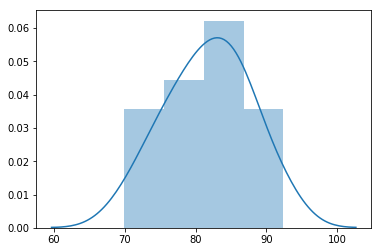

Null hypothesis rejected. Results are statistically significant.
t-value = 12.687592157174493 
critical t-value = 1.729132811521367 
p-value = 1.0053355594452825e-10


(12.687592157174493, 1.729132811521367, 1.0053355594452825e-10)

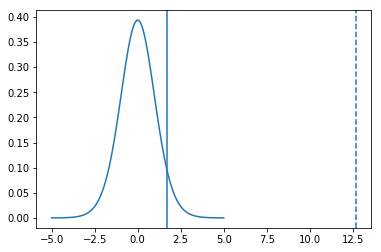

In [28]:
student_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
pop_mean = 65 #What we are testing against
alpha = 0.05  #Confidence level

one_sample_ttest(student_scores, pop_mean, alpha)

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


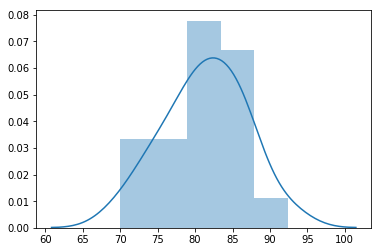

Null hypothesis rejected. Results are statistically significant.
t-value = 13.202088288314906 
critical t-value = 1.729132811521367 
p-value = 5.083361606682268e-11


(13.202088288314906, 1.729132811521367, 5.083361606682268e-11)

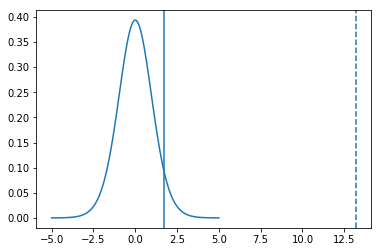

In [29]:
student_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
pop_mean = 65 #What we are testing against
alpha = 0.05  #Confidence level

one_sample_ttest(student_scores, pop_mean, alpha)

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 